# This code implement 2 agents playing the iterated prisoner's dilemma.

## Here agents play in a self-play fashion.

0 encodes defect
1 encodes cooperate

In [1]:
import numpy as np
from sklearn.utils import check_random_state
import seaborn as sns
import matplotlib.pyplot as plt
from utils_plot import configure_plt
rng = check_random_state(6)

In [2]:
# Create the reward structure
g = 1.8  # Incentive to cooperate
# As done in Artificial Intelligence and Spontaneous Collusion 2023
# Create the reward
rewards = np.zeros((2, 2))
rewards[0, 0] = 2
rewards[1, 0] = g
rewards[0, 1] = 2 + g
rewards[1, 1] = 2 * g

In [3]:
# Select discount factor and step size 
gamma = 0.6  # Discount factor
# alpha = 1
alpha = .001  # Step size
max_iter = 1_000
epsilon = .001


In [4]:
# bad_init = True
bad_init = False
Q0 = np.zeros((2, 2, 2))
# initialize Q at Nash
for i in range(2):
    for j in range(2):
        Q0[i, j, 0] = (rewards[0, 0] + rewards[0, 1]) / (2 * (1 - gamma))
        Q0[i, j, 1] = (rewards[1, 0] + rewards[1, 1]) / 2
        Q0[i, j, 1] += gamma / (1 - gamma) * (rewards[0, 0] + rewards[0, 1]) / 2
        # Q0[i, j, 1] += rewards[1, 0]
if bad_init:
    Q0 /= 2

np.testing.assert_array_less(Q0[:, :, 1], Q0[:, :, 0])


In [5]:
max_iter = 2_000
list_epsilon = [0.01, 0.05, 0.1]
# list_epsilon = [0.01, 0.05, 0.1]

n_curves = 10

dict_res = {}

for epsilon in list_epsilon:
    list_diff_Q_final = []
    for idx_curve in range(n_curves):
        # init states and Q function
        Q = Q0.copy()
        list_diff_Q = []
        a1 = 0
        a2 = 0
        for t in range(max_iter):
            best_action = Q[a1, a2].argmax()
            a1_old = a1
            a2_old = a2
            if rng.rand(1) > epsilon:
                a1 = best_action
            else:
                a1 = 1 - best_action
            if rng.rand(1) > epsilon:
                a2 = best_action
            else:
                a2 = 1 - best_action

            Q[a1_old, a2_old, a1] += alpha * (
                rewards[a1, a2] + gamma * Q[a1, a2].max() - Q[a1_old, a2_old, a1])

            diff_Q = Q[:, :, 1] - Q[:, :, 0]
            list_diff_Q.append(diff_Q)

        list_diff_Q = np.array(list_diff_Q)
        list_diff_Q_final.append(list_diff_Q.copy())
    list_diff_Q_final = np.array(list_diff_Q_final)

    dict_res[epsilon] = list_diff_Q_final.copy()


<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\e'
<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_21950/1552430492.py:10: SyntaxWarning: invalid escape sequence '\m'
  dict_label[0, 0] = "$s= (\mathrm{D}, \mathrm{D})$"
/tmp/ipykernel_21950/1552430492.py:11: SyntaxWarning: invalid escape sequence '\m'
  dict_label[1, 1] = "$s= (\mathrm{C}, \mathrm{C})$"
/tmp/ipykernel_21950/1552430492.py:12: SyntaxWarning: invalid escape sequence '\m'
  dict_label[0, 1] = "$s= (\mathrm{D}, \mathrm{C})$"
/tmp/ipykernel_21950/1552430492.py:39: SyntaxWarning: invalid escape sequence '\e'
  ax[idx_epsilon].set_title("$\epsilon = %.2f$" % epsilon, fontsize=fontsize)


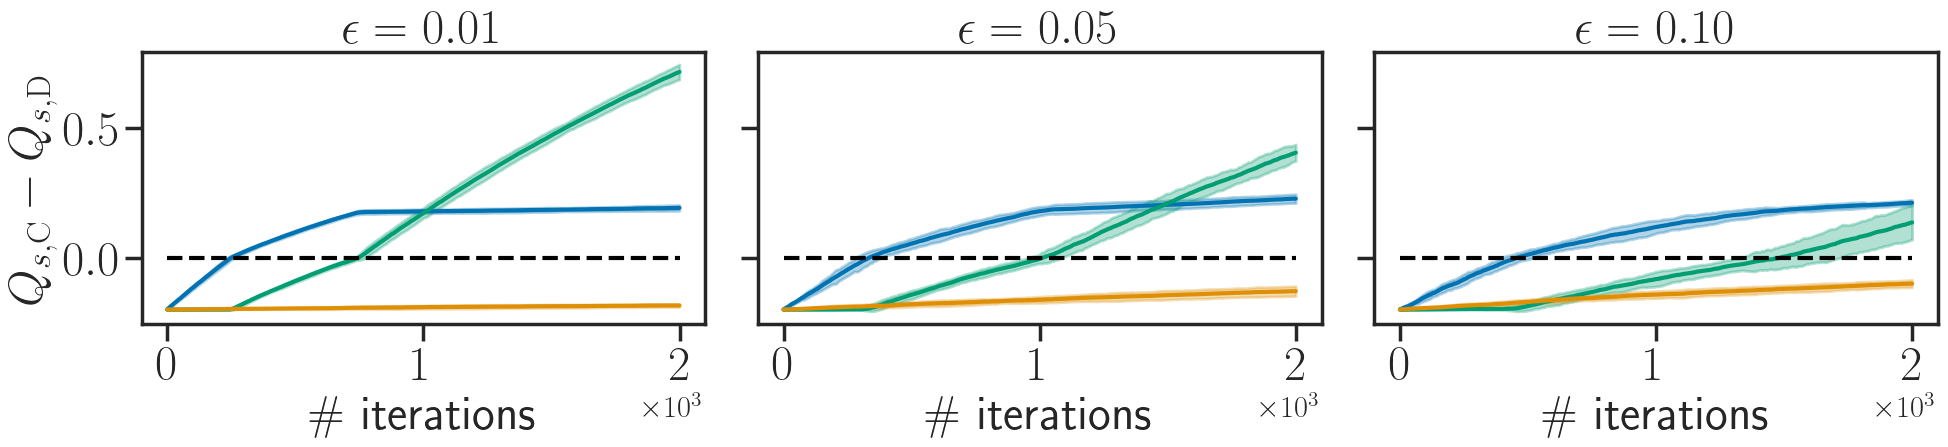

In [6]:

import seaborn as sns
palette = sns.color_palette('colorblind')
# from sns import
dict_color = {}
dict_color[0, 0] = palette[0]
dict_color[1, 1] = palette[2]
dict_color[0, 1] = palette[1]

dict_label= {}
dict_label[0, 0] = "$s= (\mathrm{D}, \mathrm{D})$"
dict_label[1, 1] = "$s= (\mathrm{C}, \mathrm{C})$"
dict_label[0, 1] = "$s= (\mathrm{D}, \mathrm{C})$"
import matplotlib
import matplotlib.pyplot as plt
plt.close('all')
from utils_plot import configure_plt
configure_plt()
figsize = (20, 5)
fontsize = 35
fig, ax = plt.subplots(
    1, len(list_epsilon), figsize=figsize, sharey=True, sharex=True)
# plot main curves
x = np.arange(max_iter)
for idx_epsilon, epsilon in enumerate(list_epsilon):

    for (a1, a2) in [[0, 0], [1, 1], [0, 1]]:
        color = dict_color[a1, a2]
        label = dict_label[a1, a2]
        mean_ = dict_res[epsilon][:, :, a1, a2].mean(axis=0)
        std_ = dict_res[epsilon][:, :, a1, a2].std(axis=0)
        ax[idx_epsilon].plot(
            x, mean_, label=label, color=color)
        ax[idx_epsilon].fill_between(
            x, (mean_ - 1.96 * std_), (mean_ + 1.96 * std_),
            color=color, alpha=.3)

    ax[idx_epsilon].set_xticks([0, max_iter // 2, max_iter])
    ax[idx_epsilon].hlines(0, 0, max_iter, colors="black", linestyles="--")
    ax[idx_epsilon].set_title("$\epsilon = %.2f$" % epsilon, fontsize=fontsize)
    ax[idx_epsilon].tick_params(axis='x', labelsize=fontsize)
    ax[idx_epsilon].tick_params(axis='y', labelsize=fontsize)
    ax[idx_epsilon].set_xlabel(r"\# iterations", fontsize=fontsize)
ax[idx_epsilon].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#     epsilon, g, alpha)
ax[0].set_ylabel(r"$Q_{s, \mathrm{C}} - Q_{s, \mathrm{D}}$", fontsize=fontsize)

plt.tight_layout()
plt.show()